# Importing data from other file types

In Chapter 1, you learnt how to use the IPython magic command ! ls to explore your current working directory. You can also do this natively in Python using the library os, which consists of miscellaneous operating system interfaces.

The first line of the following code imports the library os, the second line stores the name of the current directory in a string called wd and the third outputs the contents of the directory in a list to the shell.




In [1]:
import os
wd = os.getcwd()
os.listdir(wd)

['.DS_Store',
 '.ipynb_checkpoints',
 '1-1_FlatFiles.ipynb',
 '1-2_OtherFileTypes.ipynb',
 'ch2_pdf_slides.pdf',
 'ch_1_slides.pdf',
 'data']

## Pickle file
### Loading a pickled file

here are a number of datatypes that cannot be saved easily to flat files, such as lists and dictionaries. If you want your files to be human readable, you may want to save them as text files in a clever manner (JSONs, which you will see in a later chapter, are appropriate for Python dictionaries).

If, however, you merely want to be able to import them into Python, you can serialize them. All this means is converting the object into a sequence of bytes, or bytestream.

In this exercise, you'll import the pickle package, open a previously pickled data structure from a file and load it.

In [7]:
import pickle

# An arbitrary collection of objects supported by pickle.
data = {'Mar': '84.4', 'June': '69.4', 'Aug': '85', 'Airline': '8'}

with open('data/data.pkl', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)

In [8]:
# Import pickle package
import pickle

# Open pickle file and load data: d
with open('data/data.pkl', 'rb') as file:
    d = pickle.load(file)

# Print d
print(d)

# Print datatype of d
print(type(d))

{'Mar': '84.4', 'June': '69.4', 'Aug': '85', 'Airline': '8'}
<class 'dict'>


## Excel
### Listing sheets of Excel spreadsheets

Whether you like it or not, any working data scientist will need to deal with Excel spreadsheets at some point in time. You won't always want to do so in Excel, however!

Here you'll learn how to use pandas to import Excel spreadsheets and how to list the names of the sheets in any loaded .xlsx file.

Recall from the video that, given an Excel file imported into a variable spreadsheet, you can retrieve a list of the sheet names using the command spreadsheet.sheet_names.

Specifically, you'll be loading and checking out the spreadsheet 'battledeath.xlsx', modified from the Peace Research Institute Oslo's (PRIO) dataset. This data contains age-adjusted mortality rates due to war in various countries over several years.

In [10]:
# Import pandas
import pandas as pd

# Assign spreadsheet filename: file
file = 'data/battledeath.xlsx'

# Load spreadsheet: xl
xl = pd.ExcelFile(file)

# Print sheet names
print(xl.sheet_names)

['2002', '2004']


### Importing sheets of Excel spreadsheets

In the previous exercises, you saw that the Excel files contain two sheets, '2002' and '2004'. The next step is to import these.

In this exercise, you'll learn how to import any given sheet of your loaded .xslx file as a DataFrame. You'll be able to do so by specifying the sheet's name or its index.

The spreadsheet 'battledeath.xlsx' is already loaded as xl.

In [11]:
# Load a sheet into a DataFrame by name: df1
df1 = xl.parse('2004')

# Print the head of the DataFrame df1
print(df1.head())

# Load a sheet into a DataFrame by index: df2
df2 = xl.parse(0)

# Print the head of the DataFrame df2
print(df2.head())


  War(country)      2004
0  Afghanistan  9.451028
1      Albania  0.130354
2      Algeria  3.407277
3      Andorra  0.000000
4       Angola  2.597931
  War, age-adjusted mortality due to       2002
0                        Afghanistan  36.083990
1                            Albania   0.128908
2                            Algeria  18.314120
3                            Andorra   0.000000
4                             Angola  18.964560


### Customizing your spreadsheet import

Here you'll parse your spreadsheets and use additional arguments to skip rows, rename columns and select only particular columns.

The spreadsheet 'battledeath.xlsx' is already loaded as xl.

As before, you'll use the method parse(). This time, however, you'll add the additional arguments skiprows, names and parse_cols. These skip rows, name the columns and designate which columns to parse, respectively. All these arguments can be assigned to lists containing the specific row numbers, strings and column numbers, respectively.

In [12]:
# Parse the first sheet and rename the columns: df1
df1 = xl.parse(0, skiprows=[0], names=['Country', 'AAM due to War (2002)'])

# Print the head of the DataFrame df1
print(df1.head())

# Parse the first column of the second sheet and rename the column: df2
df2 = xl.parse(1, parse_cols=[0], skiprows=[0], names=['Country'])

# Print the head of the DataFrame df2
print(df2.head())


               Country  AAM due to War (2002)
0              Albania               0.128908
1              Algeria              18.314120
2              Andorra               0.000000
3               Angola              18.964560
4  Antigua and Barbuda               0.000000
               Country
0              Albania
1              Algeria
2              Andorra
3               Angola
4  Antigua and Barbuda


## SAS & Stata

### Importing SAS files

In this exercise, you'll figure out how to import a SAS file as a DataFrame using SAS7BDAT and pandas. 

The data are adapted from the website of the undergraduate text book [Principles of Economics](http://www.principlesofeconometrics.com/sas/) by Hill, Griffiths and Lim.

     YEAR     P           S
0  1950.0  12.9  181.899994
1  1951.0  11.9  245.000000
2  1952.0  10.7  250.199997
3  1953.0  11.3  265.899994
4  1954.0  11.2  248.500000


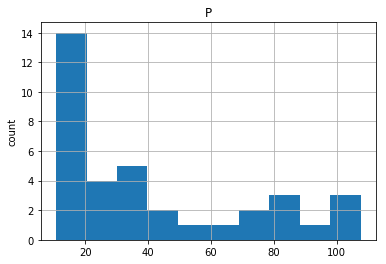

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Import sas7bdat package
from sas7bdat import SAS7BDAT

# Save file to a DataFrame: df_sas
with SAS7BDAT('data/sales.sas7bdat') as file:
    df_sas = file.to_data_frame()

# Print head of DataFrame
print(df_sas.head())

# Plot histogram of DataFrame features (pandas and pyplot already imported)
pd.DataFrame.hist(df_sas[['P']])
plt.ylabel('count')
plt.show()

### Importing Stata files
The pandas package has been imported in the environment as pd and the file disarea.dta is in your directory. The data consist of disease extent for several diseases in various countries (more information can be found [here](http://www.cid.harvard.edu/ciddata/geog/)).

  wbcode               country  disa1  disa2  disa3  disa4  disa5  disa6  \
0    AFG           Afghanistan   0.00   0.00   0.76   0.73    0.0   0.00   
1    AGO                Angola   0.32   0.02   0.56   0.00    0.0   0.00   
2    ALB               Albania   0.00   0.00   0.02   0.00    0.0   0.00   
3    ARE  United Arab Emirates   0.00   0.00   0.00   0.00    0.0   0.00   
4    ARG             Argentina   0.00   0.24   0.24   0.00    0.0   0.23   

   disa7  disa8   ...    disa16  disa17  disa18  disa19  disa20  disa21  \
0   0.00    0.0   ...       0.0     0.0     0.0    0.00    0.00     0.0   
1   0.56    0.0   ...       0.0     0.4     0.0    0.61    0.00     0.0   
2   0.00    0.0   ...       0.0     0.0     0.0    0.00    0.00     0.0   
3   0.00    0.0   ...       0.0     0.0     0.0    0.00    0.00     0.0   
4   0.00    0.0   ...       0.0     0.0     0.0    0.00    0.05     0.0   

   disa22  disa23  disa24  disa25  
0    0.00    0.02    0.00    0.00  
1    0.99    0.98   

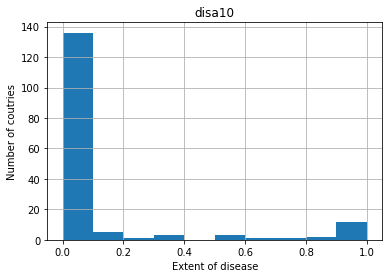

In [17]:
# Import pandas
import pandas as pd

# Load Stata file into a pandas DataFrame: df
df = pd.read_stata('data/disarea.dta')

# Print the head of the DataFrame df
print(df.head())

# Plot histogram of one column of the DataFrame
pd.DataFrame.hist(df[['disa10']])
plt.xlabel('Extent of disease')
plt.ylabel('Number of coutries')
plt.show()


## HDF5
### Using h5py to import HDF5 files

The file 'LIGO_data.hdf5' is already in your working directory. In this exercise, you'll import it using the h5py library. You'll also print out its datatype to confirm you have imported it correctly. You'll then study the structure of the file in order to see precisely what HDF groups it contains.

You can find the LIGO data plus loads of documentation and tutorials [here](https://losc.ligo.org/events/GW150914/) and [here](https://losc.ligo.org/s/events/GW150914/GW150914_tutorial.html) is a great tutorial on Signal Processing with the data.

In [18]:
# Import packages
import numpy as np
import h5py

# Assign filename: file
file = 'data/LIGO_data.hdf5'

# Load file: data
data = h5py.File(file, 'r')

# Print the datatype of the loaded file
print(type(data))

# Print the keys of the file
for key in data.keys():
    print(key)


<class 'h5py._hl.files.File'>
meta
quality
strain


### Extracting data from your HDF5 file
In this exercise, you'll extract some of the LIGO experiment's actual data from the HDF5 file and you'll visualize it.

To do so, you'll need to first explore the HDF5 group 'strain'.

Strain


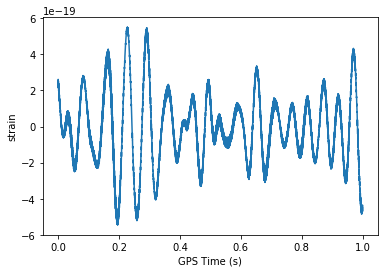

In [19]:
# Get the HDF5 group: group
group = data['strain']

# Check out keys of group
for key in group.keys():
    print(key)

# Set variable equal to time series data: strain
strain = data['strain']['Strain'].value

# Set number of time points to sample: num_samples
num_samples = 10000

# Set time vector
time = np.arange(0, 1, 1/num_samples)

# Plot data
plt.plot(time, strain[:num_samples])
plt.xlabel('GPS Time (s)')
plt.ylabel('strain')
plt.show()


## Matlab files

### Loading .mat files

n this exercise, you'll figure out how to load a MATLAB file using scipy.io.loadmat() and you'll discover what type of Python datatype it yields.

The file 'albeck_gene_expression.mat' is in your working directory. This file contains gene expression data from the Albeck Lab at UC Davis. You can find the data and some great documentation [here](https://www.mcb.ucdavis.edu/faculty-labs/albeck/workshop.htm).

In [20]:
# Import package
import scipy.io

# Load MATLAB file: mat
mat = scipy.io.loadmat('data/albeck_gene_expression.mat')

# Print the datatype type of mat
print(type(mat))


<class 'dict'>


### The structure of .mat in Python

Here you'll discover what is in the MATLAB dictionary that you loaded in the previous exercise.

dict_keys(['__header__', '__version__', '__globals__', 'fret', 'rfp'])
<class 'numpy.ndarray'>
(324, 410)


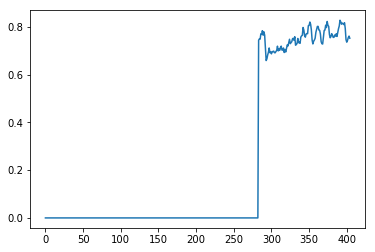

In [23]:
# Print the keys of the MATLAB dictionary
print(mat.keys())

# Print the type of the value corresponding to the key 'CYratioCyt'
print(type(mat['fret']))

# Print the shape of the value corresponding to the key 'CYratioCyt'
print(np.shape(mat['fret']))

# Subset the array and plot it
data = mat['fret'][25, 5:]
fig = plt.figure()
plt.plot(data)
plt.show()
